In [1]:
import pandas as pd
import csv
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics

In [2]:
# This function should transform data into a usable format 
def featureProcess(path):
    data = pd.read_csv(path)
    #get audio data from loudness to vect148
    features = data.loc[:, "loudness":"vect_148"]
    
    return features.values.tolist()

In [3]:
# This function should transform data into a usable format 
def labelProcess(path):
    data = pd.read_csv(path)
    #get classes
    labels = data.loc[:,"genre"].values.tolist()
    
    return labels

In [4]:
def train(trainData, trainLabel, model):
    model.fit(trainData, trainLabel)
                 
    print("train finish")

In [5]:
def predict(testData, model):
    prediction = model.predict(testData)
    return prediction

In [6]:
def evaluate(test_label, prediction):
    accuracy = metrics.accuracy_score(test_label, prediction)
    return accuracy

DATA Preprocess

In [7]:
trainData = np.array(featureProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\train_features.csv"))
validData = np.array(featureProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\valid_features.csv"))
testData = np.array(featureProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\test_features.csv"))

In [8]:
trainLabel = labelProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\train_labels.csv")
validLabel = labelProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\valid_labels.csv")

Training

In [9]:
k = 49
classifier = KNeighborsClassifier(n_neighbors=k)
train(trainData, trainLabel, classifier)

train finish


In [10]:
prediction = predict(validData, classifier)

['soul and reggae' 'classic pop and rock' 'classic pop and rock' 'folk'
 'folk' 'classic pop and rock' 'folk' 'folk' 'classic pop and rock'
 'soul and reggae' 'classic pop and rock' 'metal' 'classic pop and rock'
 'folk' 'classic pop and rock' 'soul and reggae' 'classic pop and rock'
 'classic pop and rock' 'soul and reggae' 'folk' 'folk'
 'classic pop and rock' 'folk' 'soul and reggae' 'metal'
 'classic pop and rock' 'punk' 'classic pop and rock' 'pop' 'folk'
 'classic pop and rock' 'soul and reggae' 'folk' 'soul and reggae' 'folk'
 'classic pop and rock' 'jazz and blues' 'folk' 'classic pop and rock'
 'soul and reggae' 'soul and reggae' 'folk' 'folk' 'classic pop and rock'
 'dance and electronica' 'classic pop and rock' 'folk' 'metal' 'metal'
 'folk' 'classic pop and rock' 'metal' 'folk' 'jazz and blues'
 'soul and reggae' 'folk' 'classic pop and rock' 'classic pop and rock'
 'soul and reggae' 'punk' 'metal' 'folk' 'folk' 'soul and reggae' 'folk'
 'classic pop and rock' 'metal' 'clas

In [11]:
accuracy = evaluate(validLabel, prediction)
print(accuracy)

0.34444444444444444


Predict

In [ ]:
trackID = pd.read_csv(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\test_features.csv").loc[:, "trackID"].values.tolist()
prediction = predict(testData, classifier)
result = list(zip(trackID,prediction))

In [ ]:
with open("all_KNN_outPut.csv", 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(["trackID", "genre"])
    writer.writerows(result)

K's optimization

In [14]:
#training
accuracies=[]

for k in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(trainData, trainLabel)
    prediction = classifier.predict(validData)
    accuracy = metrics.accuracy_score(validLabel, prediction)
    accuracies.append(accuracy)

The optimal value for K is 49


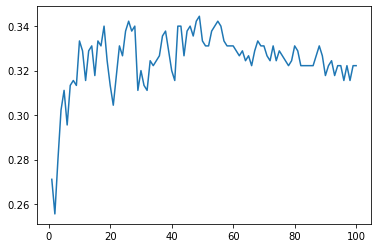

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1,101), accuracies)
print("The optimal value for K is {}".format(accuracies.index(max(accuracies)) + 1))

In [16]:
max(accuracies)

0.34444444444444444